In [50]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression,Ridge,Lasso

from sklearn.metrics import r2_score,mean_absolute_error

In [27]:
df_data = pd.read_csv('clean_data.csv')
df_data.head()

,Id,Title,Price(Triệu/tháng),Square(m²),District,City,Date
0,478324,Cho thuê phòng để ở tại 108/64A1 Trần Quang Di...,3.50,18.0,Quận 3,Hồ Chí Minh,20/06/2020
1,723089,"Phòng trọ,căn hộ mini đầy đủ tiện nghi ngay tr...",6.00,70.0,Quận 4,Hồ Chí Minh,21/11/2018
2,728993,Phòng vừa xây xong thoáng mát gần các trường Đ...,3.30,25.0,Quận 7,Hồ Chí Minh,17/10/2018
3,745037,Cho nam thuê phòng (ghép) tại quận 10. Nhà ở t...,1.45,8.0,Quận 10,Hồ Chí Minh,03/10/2018
4,781296,Cần share lại gấp phòng trọ mới thuê tại đường...,3.00,15.0,Quận 10,Hồ Chí Minh,05/10/2018


In [29]:
df_data[(df_data['Square(m²)']/df_data['Price(Triệu/tháng)'])>60]

,Id,Title,Price(Triệu/tháng),Square(m²),District,City,Date,Type
15,836668,Cho thuê KTX máy lạnh 450k/tháng ở xô viết ngh...,0.450,40.0,Bình Thạnh,Hồ Chí Minh,29/09/2018,KTX
32,841683,Cho thuê phòng ktx máy lạnh 450k/tháng ở D3,0.450,40.0,Bình Thạnh,Hồ Chí Minh,01/10/2018,KTX
72,852459,Phòng trọ KTX máy lạnh 450K/THÁNG ở bình thạnh,0.450,40.0,Bình Thạnh,Hồ Chí Minh,01/10/2018,KTX
152,881435,Ở ghép KTX máy lạnh giá 450k - Đường Ung Văn K...,0.450,35.0,Bình Thạnh,Hồ Chí Minh,24/10/2018,KTX
202,902546,Phòng trọ ở ghép KTX gần ĐH Bách Khoa,0.450,30.0,Quận 10,Hồ Chí Minh,28/10/2018,KTX
207,903557,Cho Thuê KTX Máy Lạnh Tại Q.10,0.450,30.0,Quận 10,Hồ Chí Minh,28/10/2018,KTX
238,1123705,KTX cao cấp Bình Thạnh giảm giá mạnh nga...,0.450,41.0,Bình Thạnh,Hồ Chí Minh,30/11/2018,KTX
273,1391245,"Cho thuê phòng 108/64A1 Trần Quang Diệu, P. 14...",0.002,12.0,Quận 3,Hồ Chí Minh,12/09/2020,Phòng trọ
322,1443237,"Phòng KTX máy lạnh 450k/tháng , Phước Kiển, hu...",0.450,35.0,Nhà Bè,Hồ Chí Minh,21/03/2019,KTX
354,1449493,"Tìm 1 bạn nữ ở ghép, Phước Long A, Q9, giá 700...",0.700,50.0,Quận 9,Hồ Chí Minh,02/05/2019,Phòng ở ghép


In [28]:
def type_data(df_info):
    Type = []
    for i in df_info["Title"]:
        a = i.upper().replace(' ','')
        if "KTX" in a or 'TÚC' in a:
            Type.append("KTX")
        elif "GHÉP" in a:
            Type.append("Phòng ở ghép")
        elif "HỘ" in a or "CƯ" in a or "HỘ" in a:
            Type.append("Căn hộ")
        elif "PHÒNG" in a or "TRỌ" in a or "PHÒNG" in a or "NHÀTRỌ" in a:
            Type.append("Phòng trọ")
        else:
            Type.append("Khác")
    df_info['Type'] = Type
    return df_info
df_info = type_data(df_data)

In [23]:
df_info['Type'].value_counts()

Phòng trọ       907
Căn hộ          122
Khác             58
KTX              53
Phòng ở ghép     45
Name: Type, dtype: int64

In [30]:
df_info.drop(df_info[df_info['Price(Triệu/tháng)']>100].index,inplace = True)
df_info.drop(df_data[(df_data['Square(m²)']/df_data['Price(Triệu/tháng)'])>60].index,inplace = True)

In [38]:
a = df_info.groupby('Type')['Price(Triệu/tháng)'].mean()
a.min()

1.617948717948718

In [40]:
def returnvaluetype(type):
    a_min = a.min()
    return a[type]/a_min


In [41]:
df_info['ValueType'] = df_info['Type'].apply(returnvaluetype)


0       2.215896
1       3.322310
2       2.215896
3       1.000000
4       2.215896
          ...   
1180    4.030356
1181    2.215896
1182    4.030356
1183    2.215896
1184    2.215896
Name: ValueType, Length: 1153, dtype: float64

In [42]:
b = df_info.groupby('District')['Price(Triệu/tháng)'].mean()
b

District
Bình Chánh     2.981818
Bình Thạnh     3.608092
Bình Tân       2.308696
Củ Chi         1.450000
Gò Vấp         2.858673
Hóc Môn        1.733333
Nhà Bè         3.041176
Phú Nhuận      4.743443
Quận 1         5.166667
Quận 10        3.654717
Quận 11        2.423077
Quận 12        2.172727
Quận 2        12.645455
Quận 3         4.484314
Quận 4         3.035938
Quận 5         3.532609
Quận 6         2.356250
Quận 7         3.799631
Quận 8         3.707692
Quận 9         2.471042
Thủ Đức        2.682500
Tân Bình       4.640025
Tân Phú        2.972407
Name: Price(Triệu/tháng), dtype: float64

In [43]:
def returnvaluedistrict(district):
    b_min = b.min()
    return b[district]/b_min


In [46]:
df_info['ValueDistrict'] = df_info['District'].apply(returnvaluedistrict)

23

In [59]:
df_info.iloc[0:1000].to_csv('train.csv')
df_info.iloc[1000:].to_csv('test.csv')

In [60]:
train_data=pd.read_csv('train.csv').dropna()
test_data=pd.read_csv('test.csv').dropna()

In [67]:
trainX = train_data[['Square(m²)','ValueType','ValueDistrict']]
trainY = train_data['Price(Triệu/tháng)']
testX = test_data[['Square(m²)','ValueType','ValueDistrict']]
testY = test_data['Price(Triệu/tháng)']

In [68]:
model1 = LinearRegression()
model1.fit(trainX,trainY)

LinearRegression()

In [71]:
line_pre = model1.predict(testX)

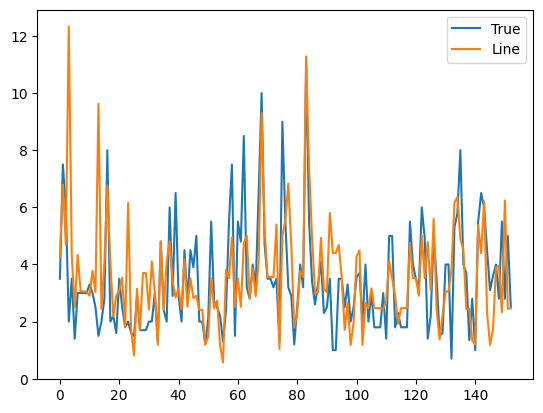

0.08913464577927477
1.1520626954953443


In [73]:

plt.plot(testY,label='True')
plt.plot(line_pre,label='Line')
plt.legend()
plt.show() 
line_score=r2_score(testY,line_pre)
line_error=mean_absolute_error(testY,line_pre)
print(line_score)
print(line_error)

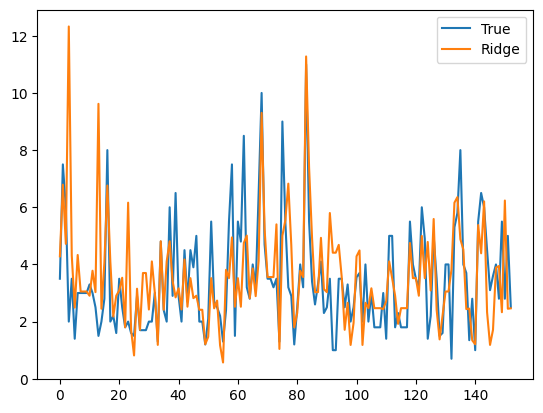

0.08954971543740953
1.151897027638317




In [74]:
model2 = Ridge()
model2.fit(trainX,trainY)
ridge_y_pre=model2.predict(testX)
plt.plot(testY,label='True')
plt.plot(ridge_y_pre,label='Ridge')
plt.legend()
plt.show() 
ridge_score=r2_score(testY,ridge_y_pre)
ridge_error=mean_absolute_error(testY,ridge_y_pre)
print(ridge_score)
print(ridge_error)

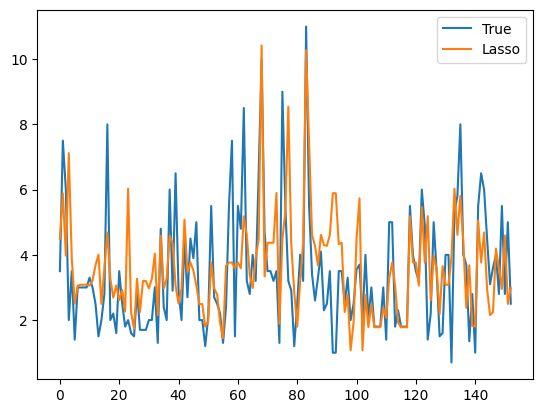

0.25786332700503756
1.1787885772601505


In [75]:
model3 = Lasso()
model3.fit(trainX,trainY)
lasso_y_pre=model3.predict(testX)
plt.plot(testY,label='True')
plt.plot(lasso_y_pre,label='Lasso')
plt.legend()
plt.show() 
lasso_score=r2_score(testY,lasso_y_pre)
lasso_error=mean_absolute_error(testY ,lasso_y_pre)
print(lasso_score)
print(lasso_error)